# Lab-6 Logistic Regression with and with out packages

## Tanishq Gupta - 19BCE1392

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Admission_Predict.csv")
print(df.shape)
print(df.info())
print(df.head())
print(df.tail())

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
None
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.0

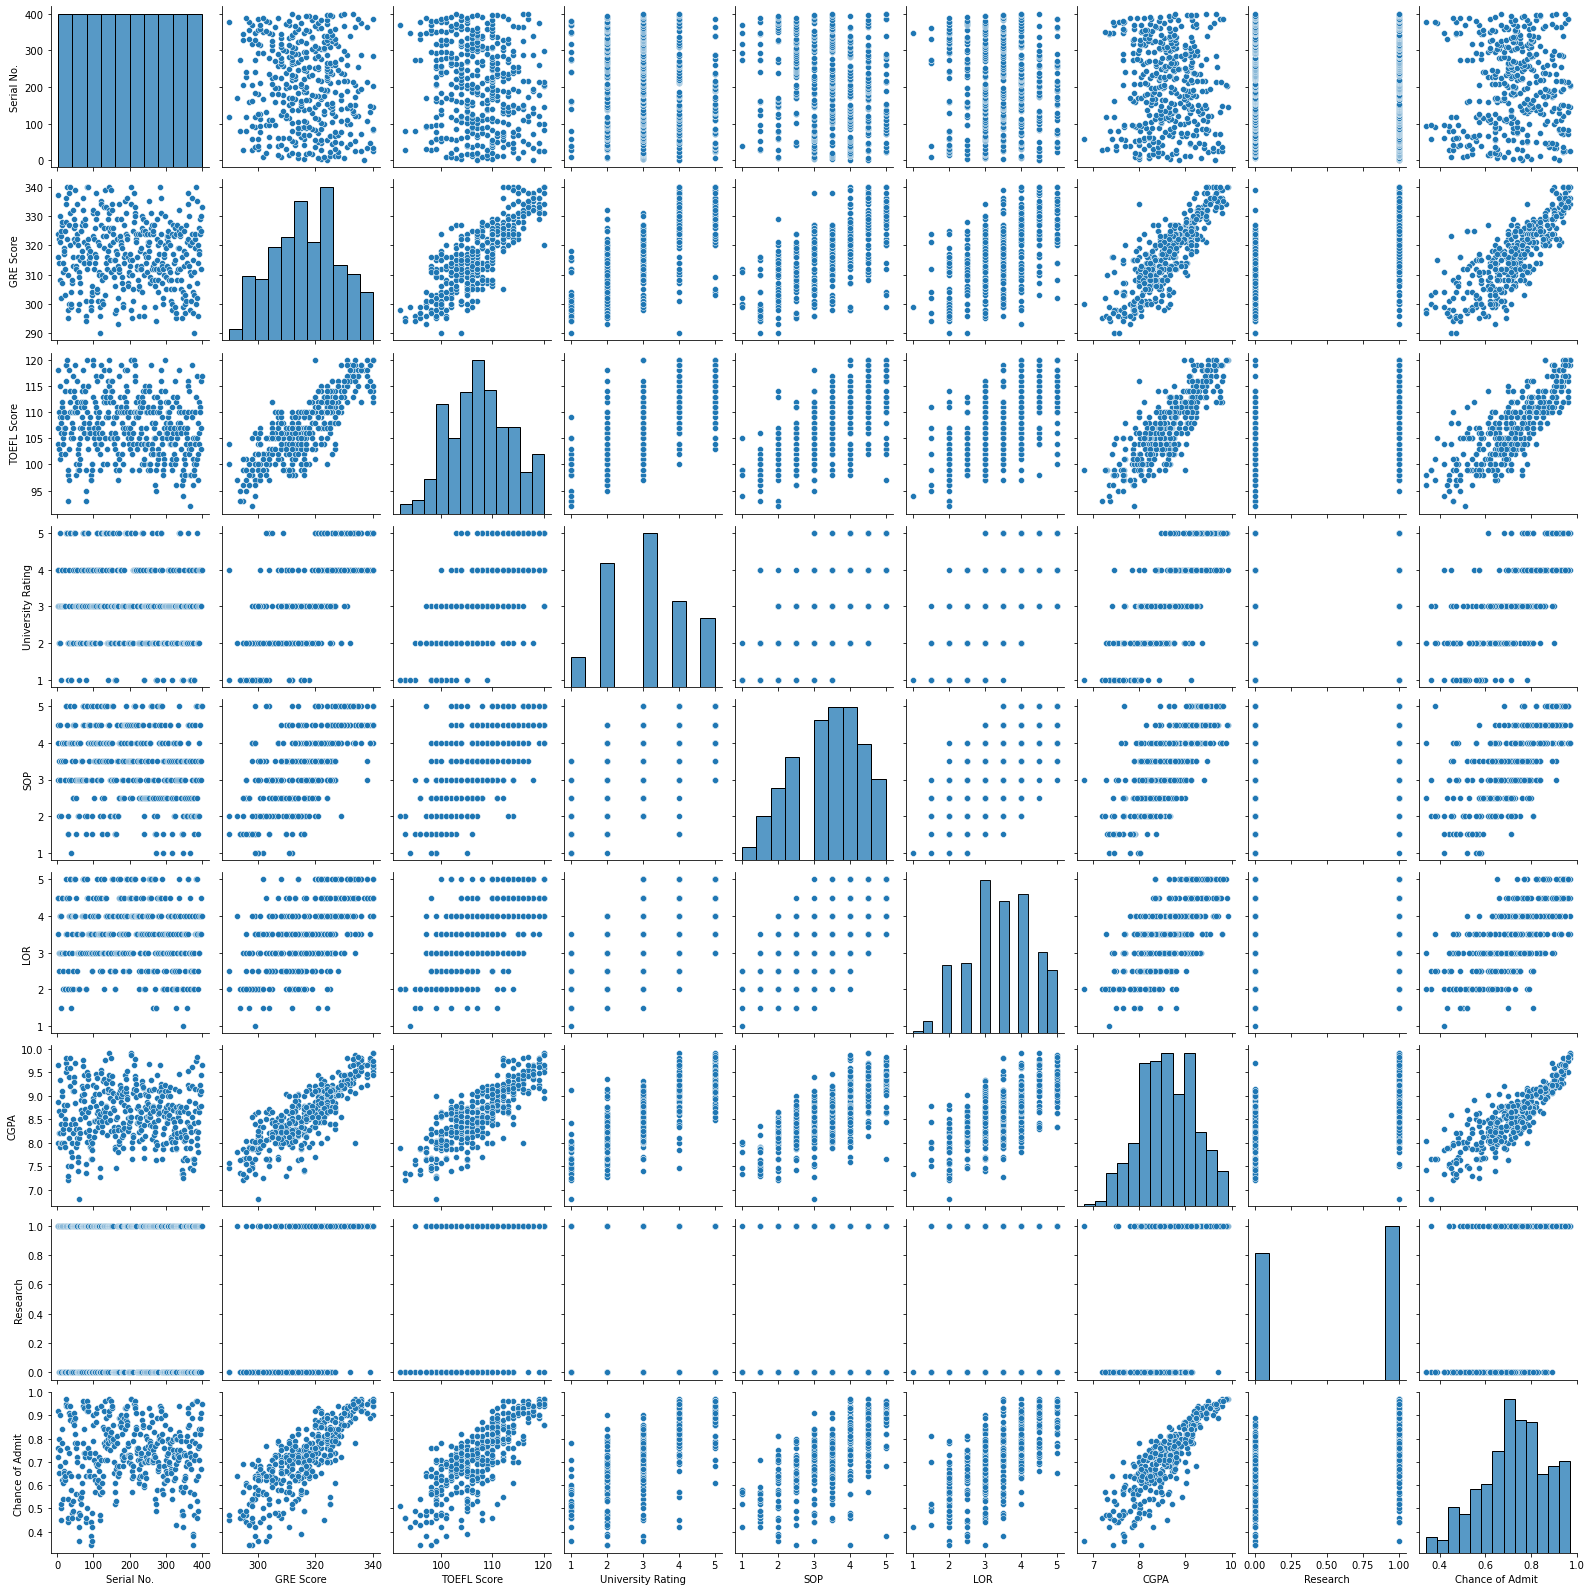

In [3]:
sb.pairplot(df)

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL

<AxesSubplot:>

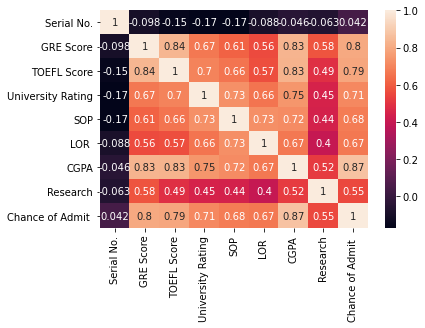

In [4]:
df1  = df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [5]:
#checking the missing values
df.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
#Removing the serial no and retaining it
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
#train and test
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2 = df.values
print(df2)
print("\n")
train_x = (df2[:,0:6])
train_y = df2[:,6]
print(train_x)
print("\n")
print("\n")
print(train_y)

[[337.   118.     4.   ...   9.65   1.     0.92]
 [324.   107.     4.   ...   8.87   1.     0.76]
 [316.   104.     3.   ...   8.     1.     0.72]
 ...
 [330.   116.     4.   ...   9.45   1.     0.91]
 [312.   103.     3.   ...   8.78   0.     0.67]
 [333.   117.     4.   ...   9.66   1.     0.95]]


[[337.   118.     4.     4.5    4.5    9.65]
 [324.   107.     4.     4.     4.5    8.87]
 [316.   104.     3.     3.     3.5    8.  ]
 ...
 [330.   116.     4.     5.     4.5    9.45]
 [312.   103.     3.     3.5    4.     8.78]
 [333.   117.     4.     5.     4.     9.66]]




[1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1

In [9]:
#min max normalization
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.94       0.92857143 0.75       0.875      0.875      0.91346154]
 [0.68       0.53571429 0.75       0.75       0.875      0.66346154]
 [0.52       0.42857143 0.5        0.5        0.625      0.38461538]
 ...
 [0.8        0.85714286 0.75       1.         0.875      0.84935897]
 [0.44       0.39285714 0.5        0.625      0.75       0.63461538]
 [0.86       0.89285714 0.75       1.         0.75       0.91666667]]


In [10]:
#Regression line fitting
#In Linear reg we give the calculated value as such
#In log reg we go for sigmodial funct over the computed value 
#and we say prob of placing the particular instance is on Class A or Class B
regress.fit(train_x,train_y)

# The coefficients y= m0x0+m1x1+...m11x11+c
print('Coefficients: ',regress.coef_)
print('Intercept: ',regress.intercept_)

Coefficients:  [[3.26740092 0.66611703 0.59315705 0.84433594 0.55397236 1.14777713]]
Intercept:  [-3.65843726]


In [11]:
#Predictions
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv("log_result_1.csv")

1.0 1.0
1.0 1.0
1.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 1.0
1.0 1.0
0.0 1.0
0.0 0.0
1.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 1.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 1.0
1.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0


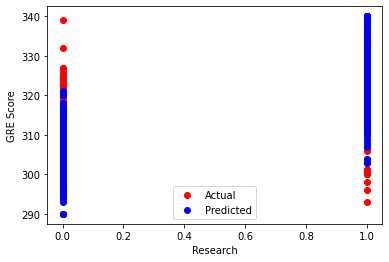

In [12]:
plt.scatter(df['Research'],df['GRE Score'],color='red',label='Actual')
plt.scatter(df['Pred'],df['GRE Score'],color = 'blue',label = 'Predicted' )
plt.xlabel('Research')
plt.ylabel('GRE Score')
plt.legend()
plt.show()

In [13]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(train_y, y_predicted))
print('Confusion Matrix\n',metrics.confusion_matrix(train_y,y_predicted))

Accucary: 0.7725
Confusion Matrix
 [[132  49]
 [ 42 177]]


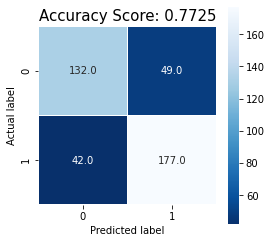

In [14]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(train_y, y_predicted))
plt.title(all_sample_title, size = 15);

In [15]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       181
         1.0       0.78      0.81      0.80       219

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



## Titanic Dataset

In [16]:
df = pd.read_csv("titanic.csv")
print(df.shape)
print(df.info())
print(df.head())
print(df.tail())

(891, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Survived
0            1       3    1  22.0      1      0   7.2500         0
1            2       1    0  38.0      1      0  71.2833         1
2            3       3    0  26.0      0      0   7.9250         1
3            4       1    0  35.0      1      0  53.1000         1
4            5       3    1  35.0      0      0   8.0500         0
     Pass

In [17]:
print(df[df['Survived']==1].count())

PassengerId    342
Pclass         342
Sex            342
Age            342
SibSp          342
Parch          342
Fare           342
Survived       342
dtype: int64


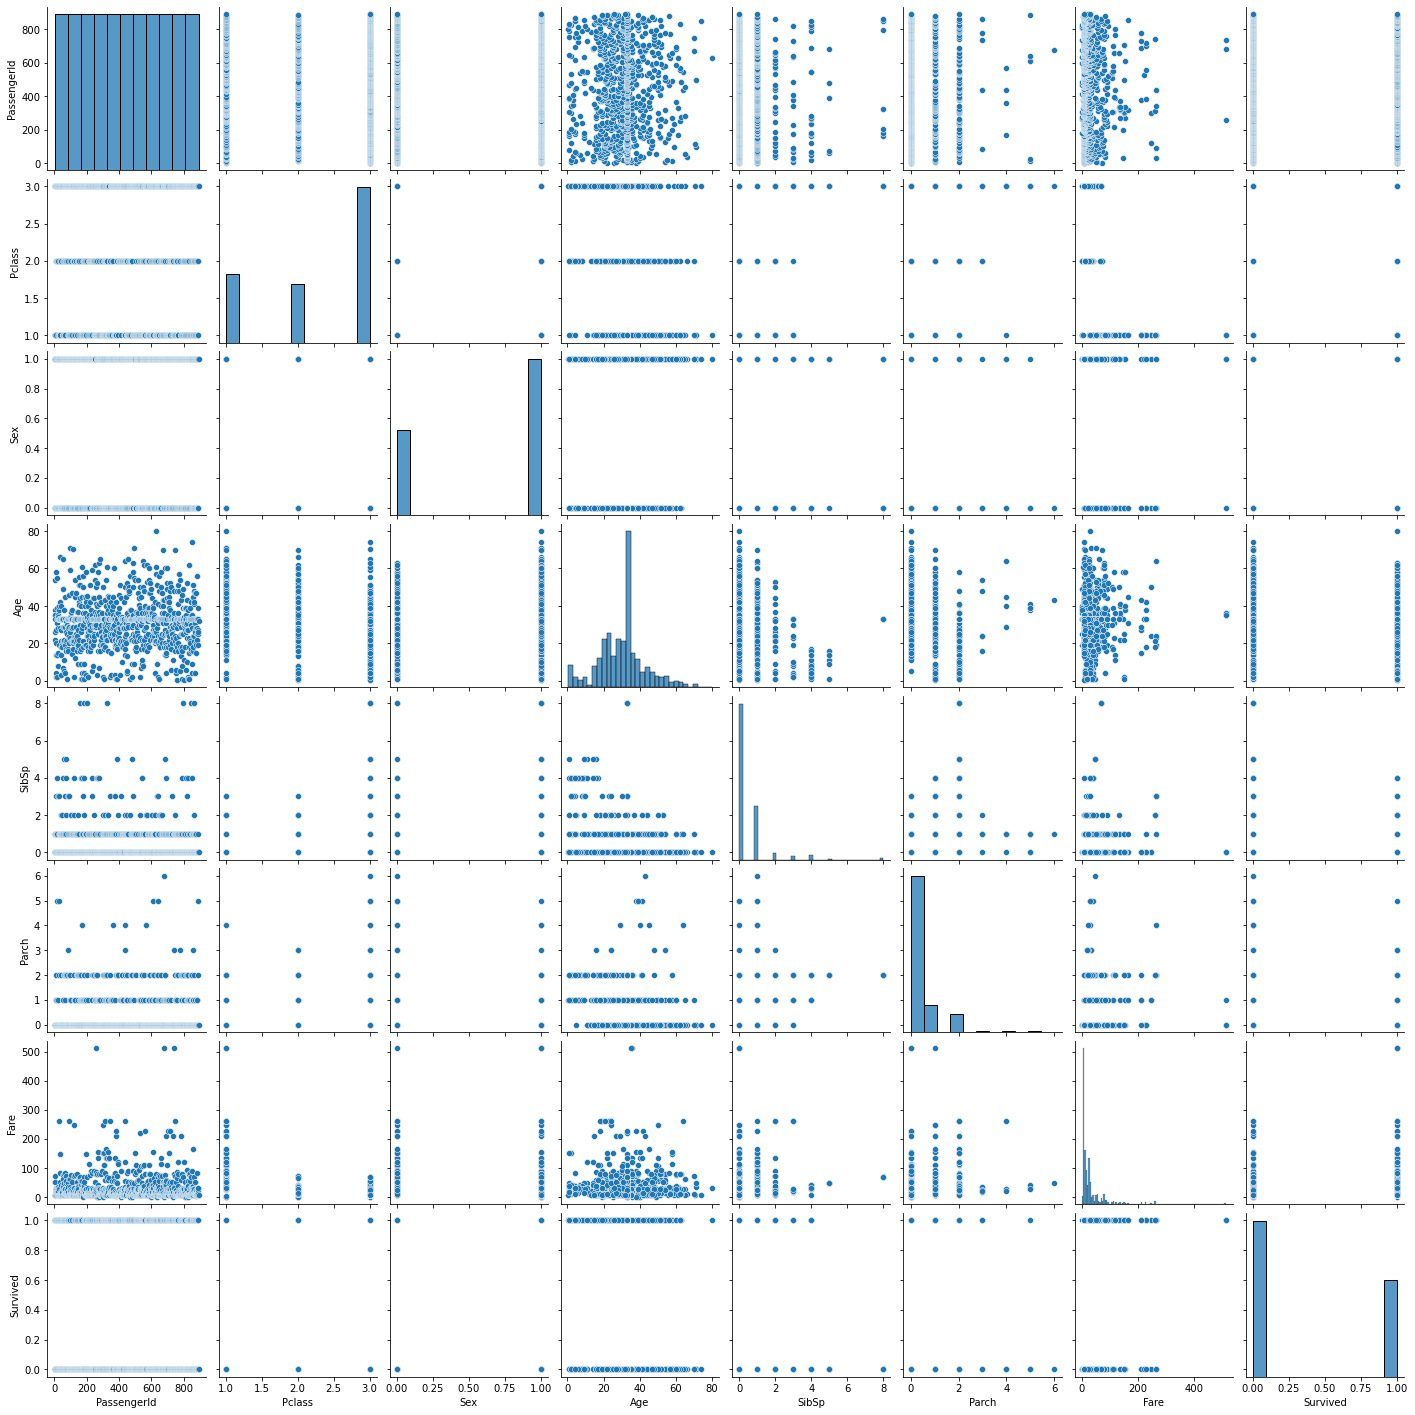

In [18]:
sb.pairplot(df)

             PassengerId    Pclass       Sex       Age     SibSp     Parch  \
PassengerId     1.000000 -0.035144  0.042939  0.031004 -0.057527 -0.001652   
Pclass         -0.035144  1.000000  0.131900 -0.312213  0.083081  0.018443   
Sex             0.042939  0.131900  1.000000  0.089292 -0.114631 -0.245489   
Age             0.031004 -0.312213  0.089292  1.000000 -0.229527 -0.190791   
SibSp          -0.057527  0.083081 -0.114631 -0.229527  1.000000  0.414838   
Parch          -0.001652  0.018443 -0.245489 -0.190791  0.414838  1.000000   
Fare            0.012658 -0.549500 -0.182333  0.080945  0.159651  0.216225   
Survived       -0.005007 -0.338481 -0.543351 -0.078749 -0.035322  0.081629   

                 Fare  Survived  
PassengerId  0.012658 -0.005007  
Pclass      -0.549500 -0.338481  
Sex         -0.182333 -0.543351  
Age          0.080945 -0.078749  
SibSp        0.159651 -0.035322  
Parch        0.216225  0.081629  
Fare         1.000000  0.257307  
Survived     0.257307  1.

<AxesSubplot:>

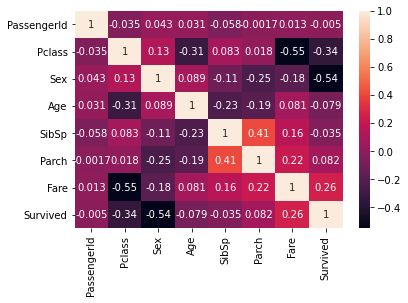

In [19]:
df1  = df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [20]:
#train and test
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2 = df.values
print(df2)
print("\n")
train_x = (df2[:,0:7])
train_y = df2[:,7]
print(train_x)
print("\n")
print("\n")
print(train_y)

[[  1.       3.       1.     ...   0.       7.25     0.    ]
 [  2.       1.       0.     ...   0.      71.2833   1.    ]
 [  3.       3.       0.     ...   0.       7.925    1.    ]
 ...
 [889.       3.       0.     ...   2.      23.45     0.    ]
 [890.       1.       1.     ...   0.      30.       1.    ]
 [891.       3.       1.     ...   0.       7.75     0.    ]]


[[  1.       3.       1.     ...   1.       0.       7.25  ]
 [  2.       1.       0.     ...   1.       0.      71.2833]
 [  3.       3.       0.     ...   0.       0.       7.925 ]
 ...
 [889.       3.       0.     ...   1.       2.      23.45  ]
 [890.       1.       1.     ...   0.       0.      30.    ]
 [891.       3.       1.     ...   0.       0.       7.75  ]]




[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 

In [21]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.         1.         1.         ... 0.125      0.         0.01415106]
 [0.0011236  0.         0.         ... 0.125      0.         0.13913574]
 [0.00224719 1.         0.         ... 0.         0.         0.01546857]
 ...
 [0.99775281 1.         0.         ... 0.125      0.33333333 0.04577135]
 [0.9988764  0.         1.         ... 0.         0.         0.0585561 ]
 [1.         1.         1.         ... 0.         0.         0.01512699]]


In [22]:
#Regression line fitting
#In Linear reg we give the calculated value as such
#In log reg we go for sigmodial funct over the computed value 
#and we say prob of placing the particular instance is on Class A or Class B
regress.fit(train_x,train_y)

# The coefficients y= m0x0+m1x1+...m11x11+c
print('Coefficients: ',regress.coef_)
print('Intercept: ',regress.intercept_)

Coefficients:  [[ 0.07197153 -1.98197095 -2.58600333 -2.12870773 -1.53562395 -0.51718765
   0.68130768]]
Intercept:  [3.20206591]


In [23]:
#Predictions
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv("log_result_2.csv")

0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 1.0
1.0 1.0
0.0 0.0
1.0 0.0
0.0 1.0
1.0 1.0
0.0 0.0
1.0 0.0
1.0 1.0
1.0 0.0
0.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 0.0
1.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0


In [24]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(train_y, y_predicted))
print('Confusion Matrix\n',metrics.confusion_matrix(train_y,y_predicted))

Accucary: 0.8002244668911336
Confusion Matrix
 [[475  74]
 [104 238]]


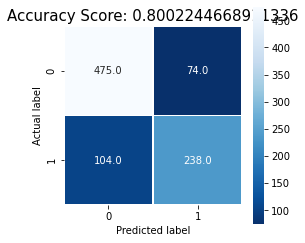

In [25]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(train_y, y_predicted))
plt.title(all_sample_title, size = 15);

In [26]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       549
         1.0       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 0.19977553310886645
Mean Squared Error: 0.19977553310886645
Root Mean Squared Error: 0.4469625634310624
